In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import sys
sys.setrecursionlimit(1500)

In [ ]:
adult_ds = pd.read_csv("adult.csv")

In [ ]:
adult_ds.columns = ['Age', 'Workclass', 'Fnlwgt', 'Education', 'EducationNum', 'MaritalStatus',
                   'Occupation', 'Relationship', 'Race', 'Sex', 'CapitalGain', 'CapitalLoss',
                   'HoursPerWeek', 'NativeCountry', 'Income']

---

##### Exploratory Data Analysis

In [ ]:
# Display first 5 entries
adult_ds.head()

In [ ]:
# Info about columns, type of data 
adult_ds.info()

In [ ]:
# Getting various statistical data like Mean, Standard Deviation, Median, Max Value, Min Value for Numerical vars
adult_ds.describe()

In [ ]:
# Getting various info for Categorical vars
adult_ds.describe(include='O')

In [ ]:
# Checking if columns have null values, if null- we replace with mean/median or simply drop these entries
adult_ds.isnull().sum()

In [ ]:
# Checking correlation between variables  
sns.heatmap(adult_ds.corr(), annot=True)

In [ ]:
# Count of Income <=50K and >50K for each category of WorkingClass
sns.countplot(data=adult_ds, x=adult_ds['Income'], hue='Workclass').set(xlabel='Income Type', ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
# Count of Income <=50K and >50K for each category of Education
sns.countplot(data=adult_ds, x=adult_ds['Income'], hue='Education').set(xlabel='Income Type', ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
# Count of Income <=50K and >50K for each category of MaritalStatus
sns.countplot(data=adult_ds, x=adult_ds['Income'], hue='MaritalStatus').set(xlabel='Income Type', ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
# Count of Income <=50K and >50K for each category of Occupation
sns.countplot(data=adult_ds, x=adult_ds['Income'], hue='Occupation').set(xlabel='Income Type', ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
# Count of Income <=50K and >50K for each category of Relationship
sns.countplot(data=adult_ds, x=adult_ds['Income'], hue='Relationship').set(xlabel='Income Type', ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
# Count of Income <=50K and >50K for each category of Race
sns.countplot(data=adult_ds, x=adult_ds['Income'], hue='Race').set(xlabel='Income Type', ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
# Count of Income <=50K and >50K for each category of Sex
sns.countplot(data=adult_ds, x=adult_ds['Income'], hue='Sex').set(xlabel='Income Type', ylabel='Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [ ]:
adult_ds['Income'].value_counts()

We can see that it is an imbalanced data, we will have to use  class_weights = ‘balanced’

In [ ]:
# Transform <=50K to 0 and >50K to 1 in Income column

adult_ds['Income'] = np.where(adult_ds['Income'] == ' <=50K', 0, 1)
adult_ds.head()

In [ ]:
adult_ds['Income'].value_counts()

In [ ]:
# We can drop EducationNum since it's a numerical value associated with Education
adult_ds = adult_ds.drop(['EducationNum'], axis=1)
adult_ds.head()

Checking if Age, Fnlwgt, CapitalGain, CapitalLoss, HoursPerWeek are linearly related to Log-Odds of Income 

In [ ]:
# Age
sns.regplot(data=adult_ds, x=adult_ds['Age'], y=adult_ds['Income'], logistic= True).set(ylabel='Log-Odds(Income)', xlabel="Age")

In [ ]:
# Fnlwgt
sns.regplot(data=adult_ds, x=adult_ds['Fnlwgt'], y=adult_ds['Income'], logistic= True).set(ylabel='Log-Odds(Income)', xlabel="Fnlwgt")

In [ ]:
# CapitalGain
sns.regplot(data=adult_ds, x=adult_ds['CapitalGain'], y=adult_ds['Income'], logistic= True).set(ylabel='Log-Odds(Income)', xlabel="CapitalGain")

In [ ]:
# CapitalLoss
sns.regplot(data=adult_ds, x=adult_ds['CapitalLoss'], y=adult_ds['Income'], logistic= True).set(ylabel='Log-Odds(Income)', xlabel="CapitalLoss")

In [ ]:
# HoursPerWeek
sns.regplot(data=adult_ds, x=adult_ds['HoursPerWeek'], y=adult_ds['Income'], logistic= True).set(ylabel='Log-Odds(Income)', xlabel="HoursPerWeek")

In [ ]:
# Outlier Analysis for Age, Fnlwgt, CapitalGain, CapitalLoss, HoursPerWeek

figure, axes = plt.subplots(3, 2, sharex=True, figsize=(16,8))

sns.boxplot(data=adult_ds[['Age']], y='Age', ax=axes[0, 0]).set(ylabel="Age")
sns.boxplot(data=adult_ds[['Fnlwgt']], y='Fnlwgt', ax=axes[0, 1]).set(ylabel="Fnlwgt")
sns.boxplot(data=adult_ds[['CapitalGain']], y='CapitalGain', ax=axes[1, 0]).set(ylabel="CapitalGain")
sns.boxplot(data=adult_ds[['CapitalLoss']], y='CapitalLoss', ax=axes[1, 1]).set(ylabel="CapitalLoss")
sns.boxplot(data=adult_ds[['HoursPerWeek']], y='HoursPerWeek', ax=axes[2, 0]).set(ylabel="HoursPerWeek")

In [ ]:
# Outlier treatment, replacing outliers with Median value
import statistics

def outlier_treatment(cols):
    q25 = adult_ds[cols].quantile(0.25)
    q75 = adult_ds[cols].quantile(0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower = q25 - cut_off
    upper = q75 + cut_off
    df = adult_ds[~((adult_ds[cols] < lower) | (adult_ds[cols] > upper)).any(axis=1)]
    return df

In [ ]:
cols = ['Age', 'Fnlwgt', 'CapitalGain', 'CapitalLoss', 'HoursPerWeek']
adult_ds = outlier_treatment(cols)

In [ ]:
# Checking outliers again
figure, axes = plt.subplots(3, 2, sharex=True, figsize=(16,8))

sns.boxplot(data=adult_ds[['Age']], y='Age', ax=axes[0, 0]).set(ylabel="Age")
sns.boxplot(data=adult_ds[['Fnlwgt']], y='Fnlwgt', ax=axes[0, 1]).set(ylabel="Fnlwgt")
sns.boxplot(data=adult_ds[['CapitalGain']], y='CapitalGain', ax=axes[1, 0]).set(ylabel="CapitalGain")
sns.boxplot(data=adult_ds[['CapitalLoss']], y='CapitalLoss', ax=axes[1, 1]).set(ylabel="CapitalLoss")
sns.boxplot(data=adult_ds[['HoursPerWeek']], y='HoursPerWeek', ax=axes[2, 0]).set(ylabel="HoursPerWeek")

---

##### WOE and IV

In [ ]:
adult_woe = adult_ds[['Age', 'Workclass', 'Fnlwgt', 'Education', 'MaritalStatus', 
        'Occupation', 'Relationship', 'Race', 'Sex', 'CapitalGain', 'CapitalLoss',
        'HoursPerWeek', 'NativeCountry']]

adult_woe.head()

In [ ]:
adult_ds.Income

In [ ]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv) 

In [ ]:
final_iv, IV = data_vars(adult_woe, adult_ds.Income)

In [ ]:
final_iv

In [ ]:
IV.sort_values('IV')

In [ ]:
# IV         Predictive Power
# <0.02      Useless
# 0.02-0.1   Weak
# 0.1-0.3    Medium
# 0.3-0.5    Strong
# >0.5       Suspicously too good

In [ ]:
# We will drop CapitalGain, CapitalLoss, Fnlwgt to begin with

adult_ds = adult_ds.drop(['Fnlwgt', 'CapitalGain', 'CapitalLoss'], axis=1)
adult_ds.head()

Function to use WOE values for categorical variables

In [ ]:
def useWOE_categorical(cols):
    for i in cols:
        col_finalIV = final_iv.loc[final_iv['VAR_NAME'] == i]
        colfinalIV_unq = col_finalIV['MIN_VALUE'].unique()
        for j in range(len(colfinalIV_unq)):
            woe_val = col_finalIV.loc[col_finalIV['MIN_VALUE'] == colfinalIV_unq[j]]['WOE'].values[0]
            adult_ds[i] = adult_ds[i].replace([colfinalIV_unq[j]], woe_val)
            

In [ ]:
# Rewrite categorical variables with their WOE values

cols = ['Race', 'NativeCountry', 'Workclass', 'Sex', 'Education', 'Occupation', 'MaritalStatus', 'Relationship']
useWOE_categorical(cols)

In [ ]:
adult_ds.head()

Function to use WOE values for numerical variables

In [ ]:
def useWOE_numerical(cols):
    for i in cols:
        woe_col = 'woe' + i
        woe_list = list()
        col_finalIV = final_iv.loc[final_iv['VAR_NAME'] == i]
        colFinalIV_len = len(col_finalIV.index)
        for x in adult_ds[i]:
            for j in range(colFinalIV_len):
                woe_val = col_finalIV['WOE'].values[j]
                if x >= col_finalIV['MIN_VALUE'].values[j] and x <= col_finalIV['MAX_VALUE'].values[j]:
                    woe_list.append(woe_val)
        adult_ds[woe_col] = woe_list

In [ ]:
# Create new columns for continuous variables with their WOE values for respective bin

cols = ['Age', 'HoursPerWeek']
useWOE_numerical(cols)

In [ ]:
adult_ds.head()

---

##### Model Development

In [ ]:
working_dt = adult_ds
y = working_dt.pop('Income')
X = working_dt

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

Imbalance in train and test data as well

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

Function to build Logistic Regression model using StatsModel with columns as an input 

In [ ]:
def logReg_statsModel(cols):
    # performing the regression and fitting the model
    log_reg = sm.Logit(y_train, X_train[cols]).fit()
    # printing result
    print(log_reg.summary())
    return log_reg

Function to build Logistic Regression model using LinearModel with columns as an input

In [ ]:
def logReg_linModel(cols):
    log_reg = LogisticRegression()
    log_reg.fit(X_train[cols], y_train)
    return log_reg

Confusion matrix and accuracy

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score, recall_score, precision_score, f1_score)

def confusionMatrix(y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(cm, columns = ['Predicted Negative', 'Predicted Positive'], index = ['Actual Negative', 'Actual Positive'])
    print ("Confusion Matrix : \n", cm_df)
    print('-'*70)
    
    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    print('-'*70)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_misclassification,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

Function to plot ROC curve

In [222]:
from sklearn.metrics import roc_curve, auc

def plotROC(y_test, y_pred):
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr, tpr, label="AUC: %.2f" %auc)
    plt.legend(loc=4)
    plt.show()

---

##### Model 1: With original values of continuous variables i.e Age, HoursPerWeek and EducationNum

In [ ]:
cols1 = ['Race', 'NativeCountry', 'Workclass', 'Sex', 'Education', 'Occupation', 'MaritalStatus', 'Relationship',
       'Age', 'HoursPerWeek']

Using StatsModel

In [ ]:
logRegSM1 = logReg_statsModel(cols1)

In [ ]:
# Test Metrics

ytest_pred1 = logRegSM1.predict(X_test[cols1])
ytest_pred1 = [1 if x > 0.5 else 0 for x in ytest_pred1]
confusionMatrix(ytest_pred1)

In [ ]:
# ROC curve
plotROC(y_test, ytest_pred1)

Using LinearModel

In [ ]:
logRegLM1 = logReg_linModel(cols1)

In [ ]:
# Test Metrics

ytest_pred1 = logRegLM1.predict(X_test[cols1])
confusionMatrix(ytest_pred1)

In [ ]:
# ROC curve
plotROC(y_test, ytest_pred1)

---

##### Model 2: With WOE values of continuous variables i.e woeAge, woeHoursPerWeek and woeEducationNum

In [ ]:
cols2 = ['Race', 'NativeCountry', 'Workclass', 'Sex', 'Education', 'Occupation', 'MaritalStatus', 'Relationship',
        'woeAge', 'woeHoursPerWeek']

In [ ]:
logRegSM2 = logReg_statsModel(cols2)

In [ ]:
# Test Metrics

ytest_pred2 = logRegSM2.predict(X_test[cols2])
ytest_pred2 = [1 if x > 0.5 else 0 for x in ytest_pred2]
confusionMatrix(ytest_pred2)

In [ ]:
# ROC curve
plotROC(y_test, ytest_pred2)

Using LinearModel

In [ ]:
logRegLM2 = logReg_linModel(cols2)

In [ ]:
# Test Metrics

ytest_pred2 = logRegLM2.predict(X_test[cols2])
confusionMatrix(ytest_pred2)

In [ ]:
# ROC curve
plotROC(y_test, ytest_pred2)

---

We see that we get a better accuracy for the actual values of Numeric vars instead of the woe values

###### Cross Validation using Linear Model

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import mean

cols = ['Race', 'NativeCountry', 'Workclass', 'Sex', 'Education', 'Occupation', 'MaritalStatus', 'Relationship',
       'Age', 'HoursPerWeek']

log_reg = LogisticRegression(solver='newton-cg', class_weight='balanced')
log_reg.fit(X_train[cols], y_train)

scores = cross_val_score(log_reg, X_train[cols], y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)
print('-'*20)
print('Mean Accuracy: %.2f' % (mean(scores)))

---

##### Our final model will be our Model 1 since that gave us a better accuracy. 

In [181]:
cols = ['Race', 'NativeCountry', 'Workclass', 'Sex', 'Education', 'Occupation', 'MaritalStatus', 'Relationship',
       'Age', 'HoursPerWeek']

logRegLM = logReg_linModel(cols)

# Test Metrics
ytest_pred = logRegLM.predict(X_test[cols])
confusionMatrix(ytest_pred)

Confusion Matrix : 
                  Predicted Negative  Predicted Positive
Actual Negative                2939                 196
Actual Positive                 441                 369
----------------------------------------------------------------------
True Positives: 369
True Negatives: 2939
False Positives: 196
False Negatives: 441
----------------------------------------------------------------------
Accuracy: 0.84
Mis-Classification: 0.16
Sensitivity: 0.46
Specificity: 0.94
Precision: 0.94
f_1 Score: 0.61


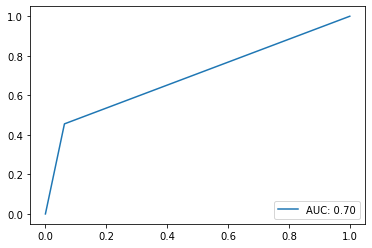

In [180]:
plotROC(y_test, ytest_pred)

---

##### We will now try to find the right threshold for this model

In [183]:
y_train_prob = logRegLM.predict_proba(X_train[cols])

##### Method 1

In [203]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob[:,1])
optimal_idx = np.argmax(tpr - fpr)

print('Optimal Threshold %.2f' %thresholds[optimal_idx])
print('-'*50)

y_pred_threshold1 = (logRegLM.predict_proba(X_test[cols]) >= thresholds[optimal_idx]).astype(int)

confusionMatrix(y_pred_threshold1[:,1])

Optimal Threshold 0.16
--------------------------------------------------
Confusion Matrix : 
                  Predicted Negative  Predicted Positive
Actual Negative                2215                 920
Actual Positive                  90                 720
----------------------------------------------------------------------
True Positives: 720
True Negatives: 2215
False Positives: 920
False Negatives: 90
----------------------------------------------------------------------
Accuracy: 0.74
Mis-Classification: 0.26
Sensitivity: 0.89
Specificity: 0.71
Precision: 0.71
f_1 Score: 0.79


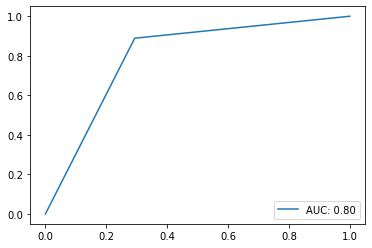

In [224]:
plotROC(y_test, y_pred_threshold1[:,1])

##### Method 2

In [215]:
from sklearn.metrics import roc_curve, auc

def optimal_threshold_method2(y_train, ytrain_pred):
    fpr, tpr, thresholds =roc_curve(y_train, ytrain_pred)
    roc_auc = auc(fpr, tpr)
    print("Area under the ROC curve : %f" % roc_auc)

    ####################################
    # The optimal cut off would be where tpr is high and fpr is low
    # tpr - (1-fpr) is zero or near to zero is the optimal cut off point
    ####################################
    i = np.arange(len(tpr)) # index for df
    roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    # Plot tpr vs 1-fpr
    fig, ax = plt.subplots()
    plt.plot(roc['tpr'])
    plt.plot(roc['1-fpr'], color = 'red')
    plt.xlabel('1-False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    ax.set_xticklabels([])
    
    return list(roc_t['thresholds'])

In [216]:
logRegSM_thr = sm.Logit(y_train, X_train[cols]).fit()
ytrain_pred = logRegSM_thr.predict(X_train[cols])

Optimization terminated successfully.
         Current function value: 0.343542
         Iterations 8


Area under the ROC curve : 0.872748
[0.25078454413167595]
--------------------------------------------------
Confusion Matrix : 
                  Predicted Negative  Predicted Positive
Actual Negative                2461                 674
Actual Positive                 169                 641
----------------------------------------------------------------------
True Positives: 641
True Negatives: 2461
False Positives: 674
False Negatives: 169
----------------------------------------------------------------------
Accuracy: 0.79
Mis-Classification: 0.21
Sensitivity: 0.79
Specificity: 0.79
Precision: 0.79
f_1 Score: 0.79


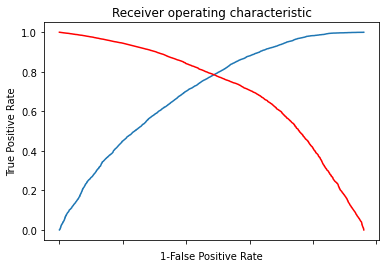

In [220]:
threshold = optimal_threshold_method2(y_train, ytrain_pred)
print(threshold)
print('-'*50)

y_pred_threshold2 = logRegSM_thr.predict(X_test[cols])
y_pred_threshold2 = y_pred_threshold2.map(lambda x: 1 if x > threshold[0] else 0)

confusionMatrix(y_pred_threshold2)